## Import libraries

In [1]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

from Function_data_processing import *




pd.set_option('display.max_columns', None)
warnings.filterwarnings('ignore')

## Load data

In [2]:
data = pd.read_csv('/Users/yuriawano/fetal_health_classification/data/fetal_health_data.csv')
data

,baseline_value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,mean_value_of_long_term_variability,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.000,0.000,0.000,0.0,0.0,73.0,0.5,43.0,2.4,64.0,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,B
1,132.0,0.006,0.000,0.006,0.003,0.0,0.0,17.0,2.1,0.0,10.4,130.0,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,A
2,133.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.1,0.0,13.4,130.0,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,A
3,134.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.4,0.0,23.0,117.0,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,A
4,132.0,0.007,0.000,0.008,0.000,0.0,0.0,16.0,2.4,0.0,19.9,117.0,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2108,140.0,0.000,0.000,0.007,0.000,0.0,0.0,79.0,0.2,25.0,7.2,40.0,137.0,177.0,4.0,0.0,153.0,150.0,152.0,2.0,0.0,B
2109,140.0,0.001,0.000,0.007,0.000,0.0,0.0,78.0,0.4,22.0,7.1,66.0,103.0,169.0,6.0,0.0,152.0,148.0,151.0,3.0,1.0,B
2110,140.0,0.001,0.000,0.007,0.000,0.0,0.0,79.0,0.4,20.0,6.1,67.0,103.0,170.0,5.0,0.0,153.0,148.0,152.0,4.0,1.0,B
2111,140.0,0.001,0.000,0.006,0.000,0.0,0.0,78.0,0.4,27.0,7.0,66.0,103.0,169.0,6.0,0.0,152.0,147.0,151.0,4.0,1.0,B


## Feature selection

In [3]:
# create a copy of the original data
data1 = data.copy()

In [4]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2113 entries, 0 to 2112
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline_value                                          2113 non-null   float64
 1   accelerations                                           2113 non-null   float64
 2   fetal_movement                                          2113 non-null   float64
 3   uterine_contractions                                    2113 non-null   float64
 4   light_decelerations                                     2113 non-null   float64
 5   severe_decelerations                                    2113 non-null   float64
 6   prolongued_decelerations                                2113 non-null   float64
 7   abnormal_short_term_variability                         2113 non-null   float64
 8   mean_value_of_short_term_variability  

### Drop columns which are more than 90% same value 


In [5]:
for i in data1.columns:
    print(data1[i].value_counts(), '\n')

133.0    136
130.0    111
122.0    106
138.0    102
125.0     91
128.0     85
120.0     78
142.0     77
144.0     76
132.0     76
136.0     72
140.0     69
134.0     67
135.0     64
146.0     61
127.0     60
137.0     59
129.0     57
143.0     56
131.0     56
123.0     53
148.0     51
121.0     44
141.0     39
139.0     39
126.0     38
145.0     36
115.0     28
150.0     26
110.0     21
149.0     18
119.0     17
152.0     17
112.0     16
151.0     14
147.0     14
159.0     12
114.0     11
158.0     10
124.0     10
118.0      9
154.0      8
106.0      7
116.0      5
156.0      4
157.0      4
117.0      2
160.0      1
Name: baseline_value, dtype: int64 

0.000    886
0.002    159
0.003    159
0.001    143
0.004    117
0.006    112
0.005    109
0.008    103
0.007     90
0.009     60
0.010     50
0.011     36
0.012     24
0.013     22
0.014     20
0.015      9
0.016      7
0.017      4
0.018      2
0.019      1
Name: accelerations, dtype: int64 

0.000    1302
0.001     164
0.002     112
0

In [6]:
data1 = data1.drop(['prolongued_decelerations', 'severe_decelerations','histogram_number_of_zeroes','histogram_tendency'], axis = 1)
data1.shape

(2113, 18)

### Feature selection by correlation matrix

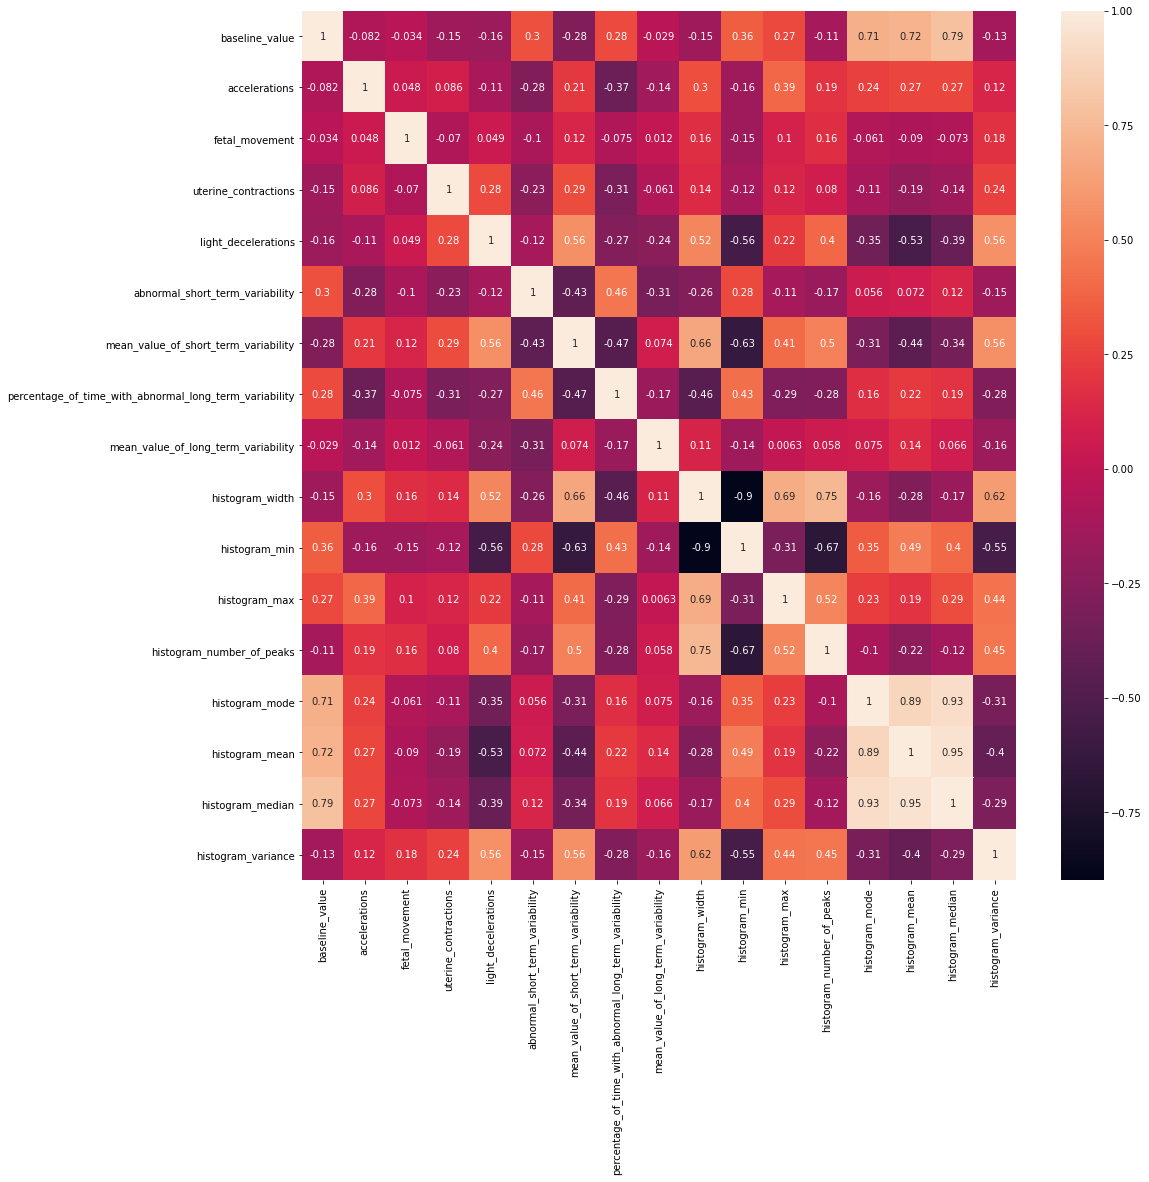

In [7]:
corr_matrix = data1.corr(method = 'pearson')
fig, ax = plt.subplots(figsize = (16, 16))
ax = sns.heatmap(corr_matrix, annot = True)
plt.show()

### Remove features that have correlation higher than 0.75

Dropped columns are 'histogram_median', 'histogram_mean'

In [8]:
# Create correlation matrix
corr_matrix = data1.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find features with correlation greater than 0.80
to_drop = [column for column in upper.columns if any(upper[column] > 0.75)]
print(to_drop)

['histogram_min', 'histogram_mean', 'histogram_median']


In [9]:
# Drop features that are greater than 0.8 or -0.8 
data1 = data1.drop(['histogram_min', 'histogram_mean', 'histogram_median'], axis=1)
data1

,baseline_value,accelerations,fetal_movement,uterine_contractions,light_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,mean_value_of_long_term_variability,histogram_width,histogram_max,histogram_number_of_peaks,histogram_mode,histogram_variance,fetal_health
0,120.0,0.000,0.000,0.000,0.000,73.0,0.5,43.0,2.4,64.0,126.0,2.0,120.0,73.0,B
1,132.0,0.006,0.000,0.006,0.003,17.0,2.1,0.0,10.4,130.0,198.0,6.0,141.0,12.0,A
2,133.0,0.003,0.000,0.008,0.003,16.0,2.1,0.0,13.4,130.0,198.0,5.0,141.0,13.0,A
3,134.0,0.003,0.000,0.008,0.003,16.0,2.4,0.0,23.0,117.0,170.0,11.0,137.0,13.0,A
4,132.0,0.007,0.000,0.008,0.000,16.0,2.4,0.0,19.9,117.0,170.0,9.0,137.0,11.0,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2108,140.0,0.000,0.000,0.007,0.000,79.0,0.2,25.0,7.2,40.0,177.0,4.0,153.0,2.0,B
2109,140.0,0.001,0.000,0.007,0.000,78.0,0.4,22.0,7.1,66.0,169.0,6.0,152.0,3.0,B
2110,140.0,0.001,0.000,0.007,0.000,79.0,0.4,20.0,6.1,67.0,170.0,5.0,153.0,4.0,B
2111,140.0,0.001,0.000,0.006,0.000,78.0,0.4,27.0,7.0,66.0,169.0,6.0,152.0,4.0,B


## Data processings and feature enginnering

### Check the data distribution

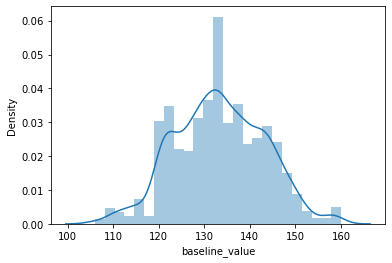

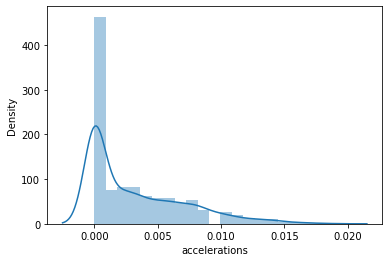

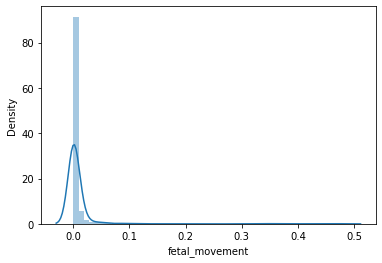

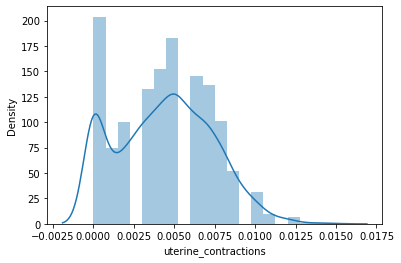

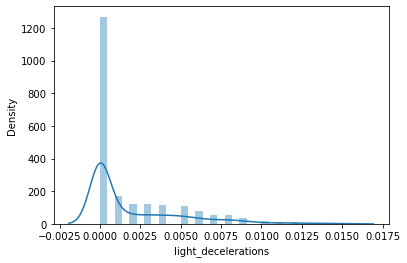

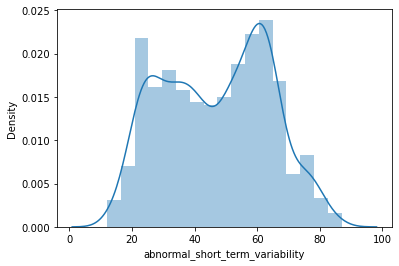

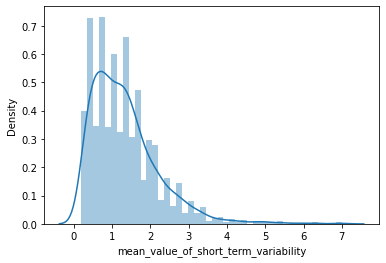

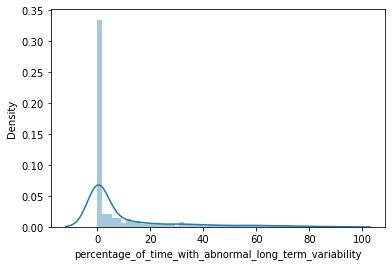

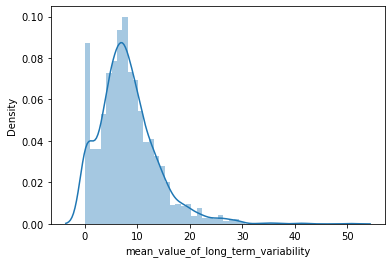

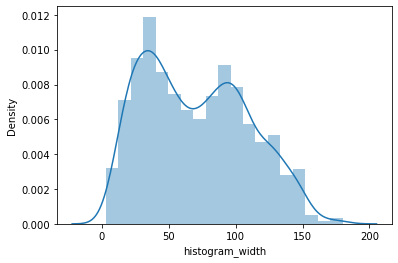

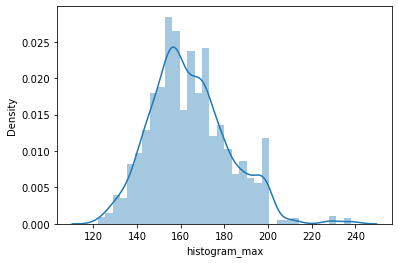

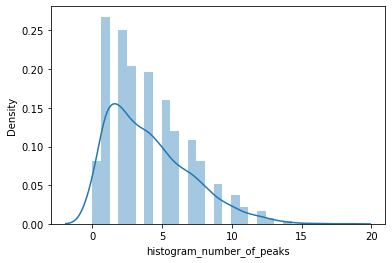

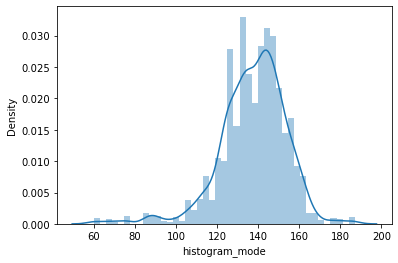

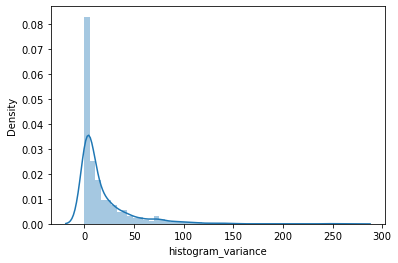

In [10]:
distplot(data1)

### Apply boxcox transformation
+ Boxcox will use all lambdas to see the best lambda per column
+ Using functions from .py file

In [11]:
data1, _ci = boxcox_transform(data1)
data1

,baseline_value,accelerations,fetal_movement,uterine_contractions,light_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,mean_value_of_long_term_variability,histogram_width,histogram_max,histogram_number_of_peaks,histogram_mode,histogram_variance,fetal_health
0,71.611347,-1.777579,-2.650519,-1.340104,-1.677820,37.264136,-0.653148,12.441990,1.080620,15.008226,1.339407,0.752864,130133.700537,4.672702,B
1,77.866926,-1.771707,-2.650519,-1.336775,-1.694483,10.777798,0.791728,8.449358,4.240083,22.632791,1.351025,2.228554,199989.478617,2.610067,A
2,78.384675,-1.811055,-2.650519,-1.329139,-1.694483,10.209278,0.791728,8.449358,5.039655,22.632791,1.351025,1.956520,199989.478617,2.698445,A
3,78.901899,-1.811055,-2.650519,-1.329139,-1.694483,10.209278,0.945344,8.449358,7.093741,21.312087,1.347523,3.221597,185227.098594,2.698445,A
4,77.866926,-1.760829,-2.650519,-1.329139,-1.677820,10.209278,0.945344,8.449358,6.491719,21.312087,1.347523,2.877034,185227.098594,2.514309,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2108,81.994480,-1.777579,-2.650519,-1.332883,-1.677820,39.771841,-1.404548,8.784570,3.235420,11.309256,1.348488,1.639072,248612.993983,0.702658,B
2109,81.994480,-1.850304,-2.650519,-1.332883,-1.677820,39.356632,-0.847267,8.069035,3.200497,15.283736,1.347379,2.228554,244306.877333,1.122632,B
2110,81.994480,-1.850304,-2.650519,-1.332883,-1.677820,39.771841,-0.847267,7.567110,2.835708,15.420003,1.347523,1.956520,248612.993983,1.424686,B
2111,81.994480,-1.850304,-2.650519,-1.336775,-1.677820,39.356632,-0.847267,9.240057,3.165310,15.283736,1.347379,2.228554,244306.877333,1.424686,B


In [12]:
for i in data1.columns:
    print(data1[i].value_counts(), '\n')

78.384675    136
76.829840    111
72.659587    106
80.965641    102
74.227625     91
75.790601     85
71.611347     78
83.021340     77
77.866926     76
84.046254     76
79.934792     72
81.994480     69
78.901899     67
79.418603     64
85.069252     61
75.270163     60
80.450470     59
76.310492     57
83.534038     56
77.348650     56
73.182838     53
86.090364     51
72.135759     44
81.480310     39
82.508155     39
74.749173     38
84.557990     36
68.980338     28
87.109619     26
66.333870     21
86.600222     18
88.127044     17
71.086346     17
67.394362     16
85.580042     14
87.618558     14
91.674017     12
68.452306     11
73.705515     10
91.168616     10
70.560751      9
89.142668      8
64.205028      7
69.507753      5
90.662783      4
90.156517      4
70.034555      2
92.178990      1
Name: baseline_value, dtype: int64 

-1.777579    886
-1.811055    159
-1.828231    159
-1.850304    143
-1.796443    117
-1.771707    112
-1.783485    109
-1.750665    103
-1.760829  

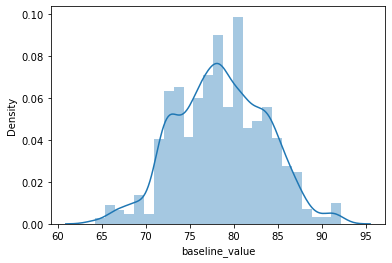

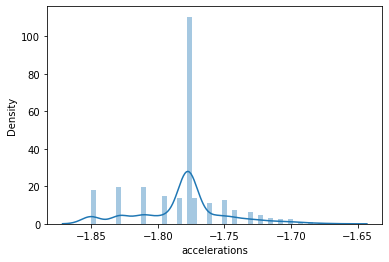

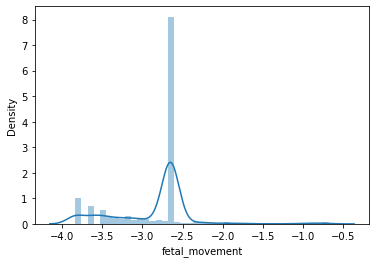

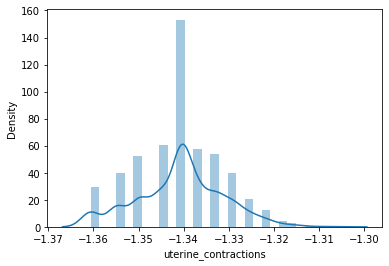

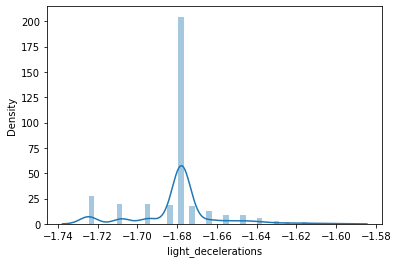

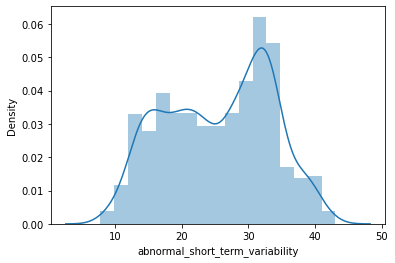

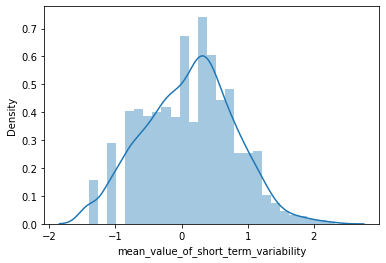

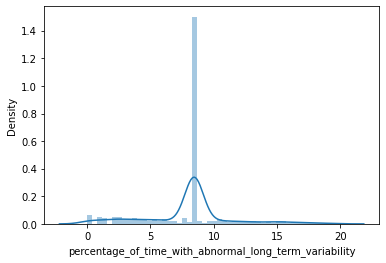

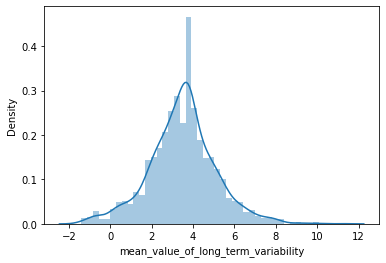

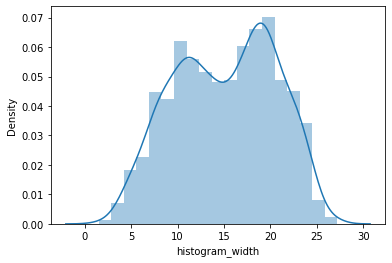

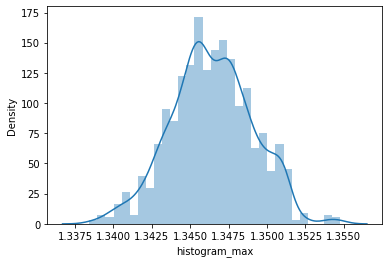

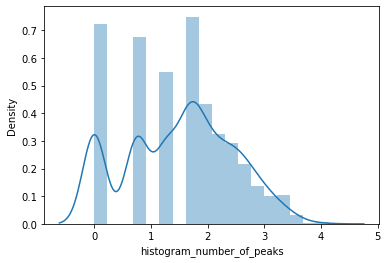

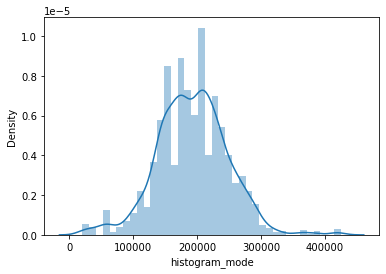

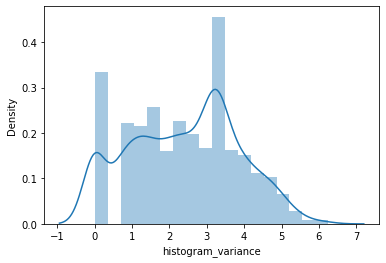

In [13]:
distplot(data1)

### Replace outliers

import functions from .py file

#### Plot a boxplot to find outliers in each numerical features
0utliers in columns:
- 'accelarations
- 'fetal_movement'
- 'uterine_contractions'
- 'mean_value_of_short_term_variability'
- 'percentage_of_time_with_abnormal_long_term_variability'
- 'mean_value_of_long_term_variability'
- 'histogram_max'
- 'histogram_mode'

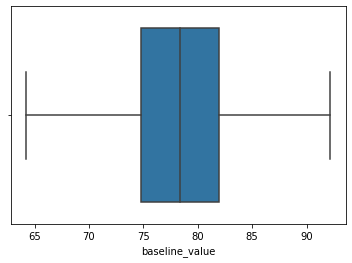

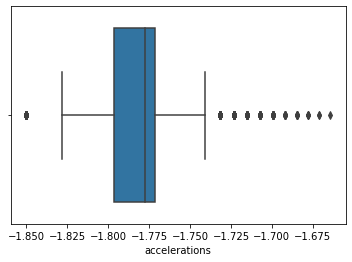

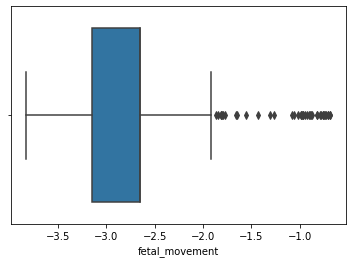

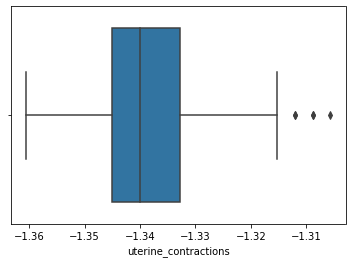

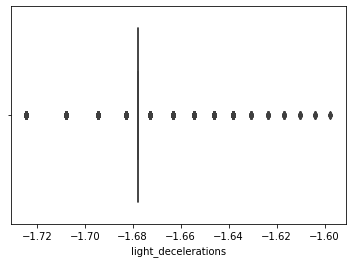

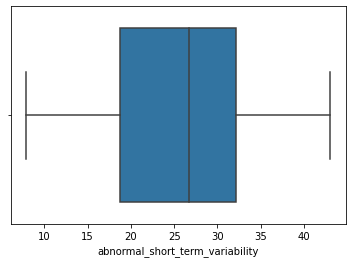

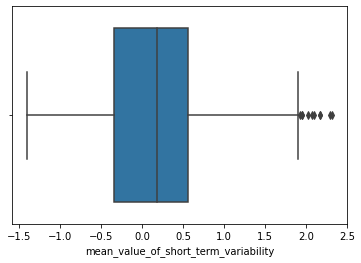

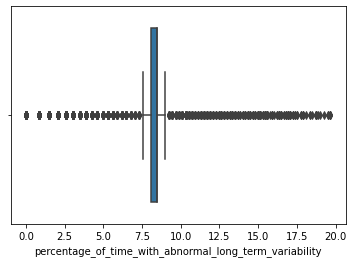

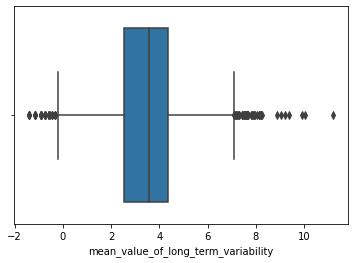

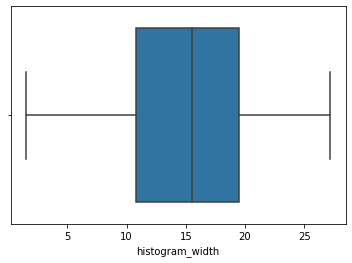

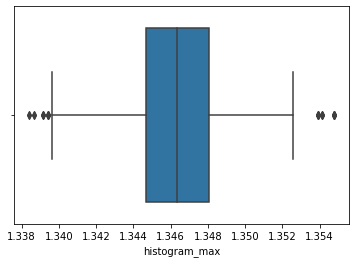

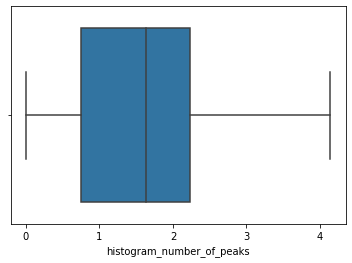

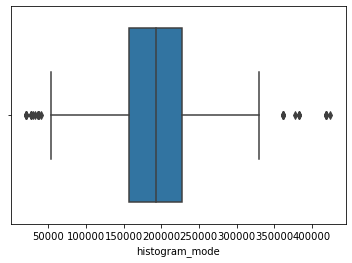

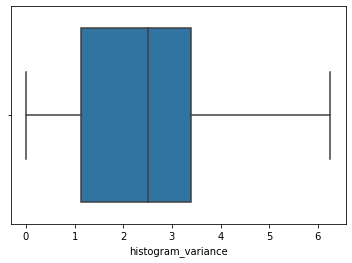

In [14]:
boxplot(data1)

In [15]:
replace_outliers(data1, in_columns = ['accelerations', 'fetal_movement', 
                                      'uterine_contractions', 'mean_value_of_short_term_variability',
                                      'percentage_of_time_with_abnormal_long_term_variability',
                                      'mean_value_of_long_term_variability',
                                    'histogram_max','histogram_mode'])

,baseline_value,accelerations,fetal_movement,uterine_contractions,light_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,mean_value_of_long_term_variability,histogram_width,histogram_max,histogram_number_of_peaks,histogram_mode,histogram_variance,fetal_health
0,71.611347,-1.833548,-3.904537,-1.363542,-1.677820,37.264136,-1.698371,7.49855,-0.229605,15.008226,1.339407,0.752864,53149.942412,4.672702,B
1,77.866926,-1.833548,-3.904537,-1.363542,-1.694483,10.777798,-1.698371,7.49855,-0.229605,22.632791,1.339612,2.228554,53149.942412,2.610067,A
2,78.384675,-1.833548,-3.904537,-1.363542,-1.694483,10.209278,-1.698371,7.49855,-0.229605,22.632791,1.339612,1.956520,53149.942412,2.698445,A
3,78.901899,-1.833548,-3.904537,-1.363542,-1.694483,10.209278,-1.698371,7.49855,-0.229605,21.312087,1.339612,3.221597,53149.942412,2.698445,A
4,77.866926,-1.833548,-3.904537,-1.363542,-1.677820,10.209278,-1.698371,7.49855,-0.229605,21.312087,1.339612,2.877034,53149.942412,2.514309,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2108,81.994480,-1.833548,-3.904537,-1.363542,-1.677820,39.771841,-1.698371,7.49855,-0.229605,11.309256,1.339612,1.639072,53149.942412,0.702658,B
2109,81.994480,-1.850304,-3.904537,-1.363542,-1.677820,39.356632,-1.698371,7.49855,-0.229605,15.283736,1.339612,2.228554,53149.942412,1.122632,B
2110,81.994480,-1.850304,-3.904537,-1.363542,-1.677820,39.771841,-1.698371,7.49855,-0.229605,15.420003,1.339612,1.956520,53149.942412,1.424686,B
2111,81.994480,-1.850304,-3.904537,-1.363542,-1.677820,39.356632,-1.698371,7.49855,-0.229605,15.283736,1.339612,2.228554,53149.942412,1.424686,B


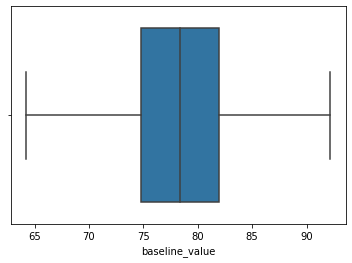

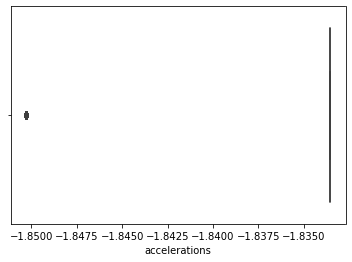

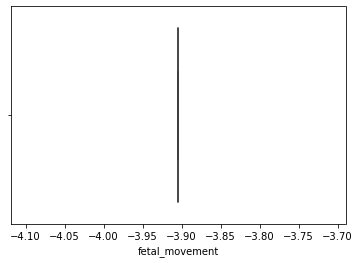

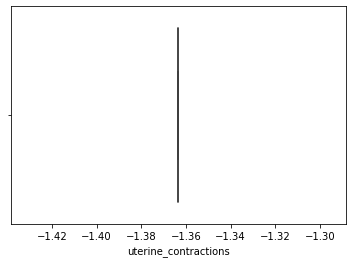

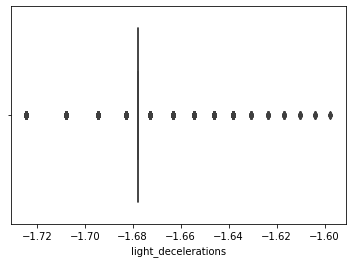

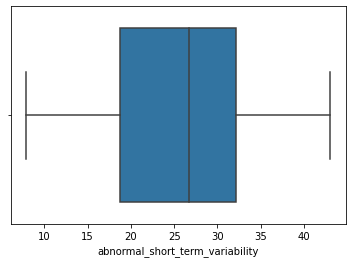

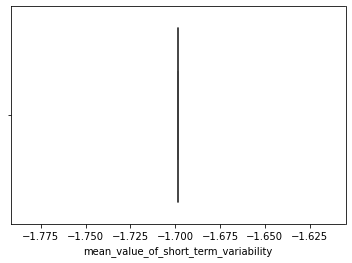

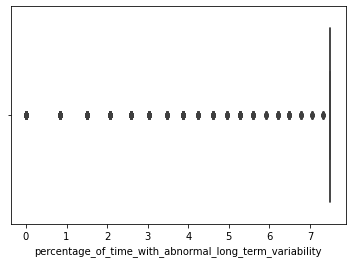

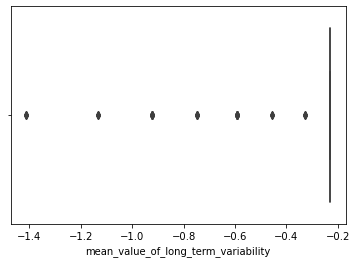

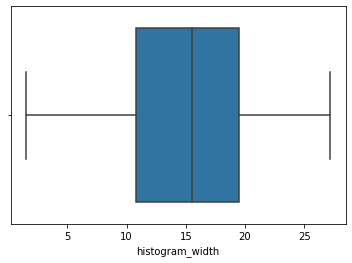

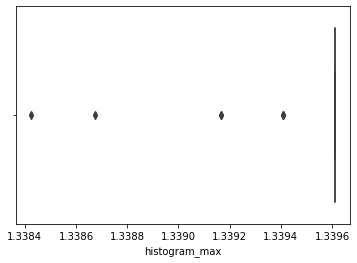

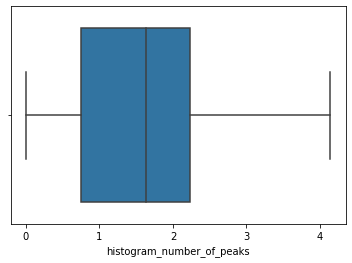

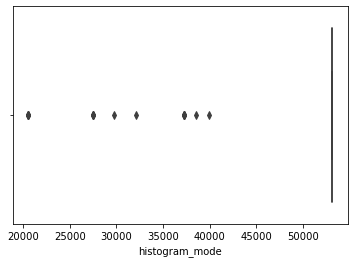

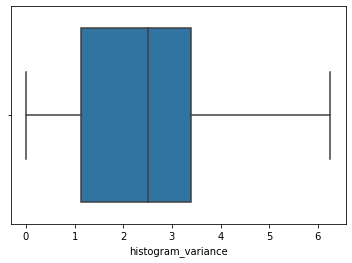

In [16]:
boxplot(data1)

In [17]:
data1.to_csv('fetal_health_modeling.csv', index = False)